In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
data = pd.read_csv('data/marcus/wandb_export_2025-01-27T22_44_19.819+01_00.csv')
data2 = pd.read_csv('data/marcus/wandb_export_2025-01-27T22_44_35.150+01_00.csv')
data3 = pd.read_csv('data/marcus/wandb_export_2025-01-27T22_44_53.267+01_00.csv')
data4 = pd.read_csv('data/marcus/wandb_export_2025-01-27T22_45_09.357+01_00.csv')
data5 = pd.read_csv('data/marcus/wandb_export_2025-01-27T22_45_23.655+01_00.csv')

pd.set_option("display.max_columns", None)

In [34]:
print(len(data.columns))
print(len(data2.columns))
print(len(data3.columns))
print(len(data4.columns))
print(len(data5.columns))

57
57
57
57
57


In [35]:
data_columns = data.columns
data2_columns = data2.columns
data3_columns = data3.columns
data4_columns = data4.columns
data5_columns = data5.columns

In [36]:
if (data_columns.equals(data2_columns) and
    data_columns.equals(data3_columns) and
    data_columns.equals(data4_columns) and
    data_columns.equals(data5_columns)):
    print("All column names are equal")
else:
    print("Column names are not equal")

All column names are equal


In [37]:
print(data.shape)
print(data2.shape)
print(data3.shape)
print(data4.shape)
print(data5.shape)

(11, 57)
(16, 57)
(6, 57)
(4, 57)
(71, 57)


In [38]:
merged_data = pd.concat([data, data2, data3, data4, data5], axis=0)

In [39]:
merged_data.head()

,Name,State,Notes,User,Tags,Created,Runtime,Sweep,_hash,data_path,dislike_threshold,end_sep,like_threshold,min_neg_ratings,min_pos_ratings,model_type,nb_neg,nb_pos,nb_test_users,offset,prompt_id,prompts,sep,users_seed,xp_name,ndcg_1,ndcg_1_std,ndcg_2,ndcg_2_std,ndcg_3,ndcg_3_std,ndcg_4,ndcg_4_std,ndcg_5,ndcg_5_std,pop_1,pop_1_std,precision_1,precision_1_std,precision_2,precision_2_std,precision_3,precision_3_std,precision_4,precision_4_std,precision_5,precision_5_std,recall_1,recall_1_std,recall_2,recall_2_std,recall_3,recall_3_std,recall_4,recall_4_std,recall_5,recall_5_std
0,rural-leaf-11,finished,-,NaN,NaN,2025-01-27T14:52:41.000Z,33,NaN,1938417246314549500,/root/.local/share/gpt-rec/ml-1m,2.5,",",4,5,21,gpt2,4,5,50,0,4,"('[M]', 'Movies like [M]', 'Movies similar to ...",",",0,prompts_types,0.40,0.489898,0.500949,0.461240,0.580949,0.407664,0.649857,0.333249,0.696279,0.257919,6.091592,6.336837,0.40,0.489898,0.28,0.248193,0.240000,0.149666,0.220,0.081240,0.2,5.551115e-17,0.40,0.489898,0.56,0.496387,0.72,0.448999,0.88,0.324962,1.0,0.0
1,balmy-shape-10,finished,-,NaN,NaN,2025-01-27T14:52:06.000Z,33,NaN,15718184768250212,/root/.local/share/gpt-rec/ml-1m,2.5,",",4,5,21,gpt2,4,5,50,0,3,"('[M]', 'Movies like [M]', 'Movies similar to ...",",",0,prompts_types,0.44,0.496387,0.528330,0.465400,0.608330,0.407019,0.668625,0.338583,0.715047,0.261465,5.840028,4.874842,0.44,0.496387,0.29,0.246779,0.246667,0.146211,0.220,0.081240,0.2,5.551115e-17,0.44,0.496387,0.58,0.493559,0.74,0.438634,0.88,0.324962,1.0,0.0
2,resilient-smoke-9,finished,-,NaN,NaN,2025-01-27T14:51:31.000Z,33,NaN,1231164804564306000,/root/.local/share/gpt-rec/ml-1m,2.5,",",4,5,21,gpt2,4,5,50,0,2,"('[M]', 'Movies like [M]', 'Movies similar to ...",",",0,prompts_types,0.50,0.500000,0.613567,0.441801,0.713567,0.335372,0.739408,0.293356,0.762619,0.245303,7.600206,6.735355,0.50,0.500000,0.34,0.233238,0.293333,0.108321,0.235,0.059372,0.2,5.551115e-17,0.50,0.500000,0.68,0.466476,0.88,0.324962,0.94,0.237487,1.0,0.0
3,celestial-forest-8,finished,-,NaN,NaN,2025-01-27T14:50:56.000Z,33,NaN,1255133696033055500,/root/.local/share/gpt-rec/ml-1m,2.5,",",4,5,21,gpt2,4,5,50,0,1,"('[M]', 'Movies like [M]', 'Movies similar to ...",",",0,prompts_types,0.44,0.496387,0.604042,0.422649,0.624042,0.405056,0.684336,0.333392,0.730759,0.251826,7.386458,6.264792,0.44,0.496387,0.35,0.229129,0.246667,0.146211,0.220,0.081240,0.2,5.551115e-17,0.44,0.496387,0.70,0.458258,0.74,0.438634,0.88,0.324962,1.0,0.0
4,earnest-microwave-7,finished,-,NaN,NaN,2025-01-27T14:50:20.000Z,34,NaN,249753074281529280,/root/.local/share/gpt-rec/ml-1m,2.5,",",4,5,21,gpt2,4,5,50,0,0,"('[M]', 'Movies like [M]', 'Movies similar to ...",",",0,prompts_types,0.24,0.427083,0.404042,0.424558,0.504042,0.373418,0.564336,0.317790,0.626233,0.226370,6.776816,6.558995,0.24,0.427083,0.25,0.250000,0.233333,0.152753,0.210,0.091652,0.2,5.551115e-17,0.24,0.427083,0.50,0.500000,0.70,0.458258,0.84,0.366606,1.0,0.0


In [62]:
data_filtered = merged_data[['State','Name', 'Runtime', 'model_type', 'nb_pos', 'ndcg_1', 'ndcg_1_std', 'pop_1', 'pop_1_std', 'precision_1', 'precision_1_std','prompt_id', 'prompts','nb_test_users', 'offset']]
data_filtered = data_filtered.reset_index()
data_filtered_gpt2 = data_filtered[data_filtered['model_type'] == 'gpt2']
data_filtered_gpt2 = data_filtered_gpt2.reset_index()


In [65]:
data_filtered_prompt_id_0 = data_filtered[data_filtered['prompt_id'] == 0]
data_filtered_prompt_id_0

,index,State,Name,Runtime,model_type,nb_pos,ndcg_1,ndcg_1_std,pop_1,pop_1_std,precision_1,precision_1_std,prompt_id,prompts,nb_test_users,offset
4,4,finished,earnest-microwave-7,34,gpt2,5,0.24,0.427083,6.776816,6.558995,0.24,0.427083,0,"('[M]', 'Movies like [M]', 'Movies similar to ...",50,0
5,5,failed,clean-dragon-6,19,gpt2,5,NaN,NaN,NaN,NaN,NaN,NaN,0,"('[M]', 'Movies like [M]', 'Movies similar to ...",50,0
10,10,finished,chocolate-fog-1,43,gpt2,5,0.40,0.489898,6.763097,6.357864,0.40,0.489898,0,"('[M]', 'Movies like [M]', 'Movies similar to ...",50,0
11,0,finished,fluent-lion-16,34,gpt2,20,0.34,0.473709,5.192877,5.248351,0.34,0.473709,0,"('[M]', 'Movies like [M]', 'Movies similar to ...",50,0
12,1,finished,solar-tree-15,34,gpt2,15,0.36,0.480000,5.509439,5.569917,0.36,0.480000,0,"('[M]', 'Movies like [M]', 'Movies similar to ...",50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,66,finished,sage-eon-5,33,gpt2,7,0.36,0.480000,5.238915,5.470934,0.36,0.480000,0,"('[M]', 'Movies like [M]', 'Movies similar to ...",50,0
104,67,finished,polished-firefly-4,33,gpt2,5,0.50,0.500000,6.878243,6.024310,0.50,0.500000,0,"('[M]', 'Movies like [M]', 'Movies similar to ...",50,0
105,68,finished,deep-river-3,33,gpt2,3,0.22,0.414246,4.391376,3.881398,0.22,0.414246,0,"('[M]', 'Movies like [M]', 'Movies similar to ...",50,0
106,69,finished,fanciful-shape-2,33,gpt2,2,0.34,0.473709,4.444710,4.264620,0.34,0.473709,0,"('[M]', 'Movies like [M]', 'Movies similar to ...",50,0


In [41]:
data_filtered['MAP@1'] = data_filtered['precision_1'] / data_filtered.shape[0] * 100

In [42]:
data_filtered_gpt_medium = data_filtered[data_filtered['model_type'] == 'gpt2-medium']
data_filtered_gpt_large = data_filtered[data_filtered['model_type'] == 'gpt2-large']
data_filtered_bert_base = data_filtered[data_filtered['model_type'] == 'bert-base-uncased']
data_filtered_bert_large = data_filtered[data_filtered['model_type'] == 'bert-large-uncased']
data_filtered_bpr = data_filtered[data_filtered['model_type'] == 'bpr']

In [43]:
data_filtered['model_type'].unique()

array(['gpt2', 'gpt2-medium', 'gpt2-large', 'bert-large-uncased',
       'bert-base-uncased', 'bpr'], dtype=object)

In [61]:
data_filtered_gpt2['MAP@1'] = data_filtered_gpt2['precision_1'] / data_filtered_gpt2.shape[0] * 100

In [45]:
data_filtered_gpt2.describe()

,level_0,index,Runtime,nb_pos,ndcg_1,ndcg_1_std,pop_1,pop_1_std,precision_1,precision_1_std,prompt_id,nb_test_users,offset,MAP@1
count,75.000000,75.000000,75.000000,75.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,75.000000,75.0,75.0,73.000000
mean,51.066667,25.306667,33.773333,7.093333,0.341918,0.468759,5.309211,5.180705,0.341918,0.468759,0.266667,50.0,0.0,0.455890
std,34.033899,22.305601,3.985017,5.657268,0.069455,0.022899,0.901332,0.787060,0.069455,0.022899,0.859499,0.0,0.0,0.092607
min,0.000000,0.000000,16.000000,1.000000,0.220000,0.414246,3.497388,3.687818,0.220000,0.414246,0.000000,50.0,0.0,0.293333
25%,18.500000,7.000000,33.000000,3.000000,0.300000,0.458258,4.644841,4.651691,0.300000,0.458258,0.000000,50.0,0.0,0.400000
50%,50.000000,15.000000,33.000000,5.000000,0.340000,0.473709,5.303604,5.120789,0.340000,0.473709,0.000000,50.0,0.0,0.453333
75%,80.000000,43.000000,34.000000,10.000000,0.380000,0.485386,5.853952,5.774158,0.380000,0.485386,0.000000,50.0,0.0,0.506667
max,107.000000,70.000000,46.000000,20.000000,0.520000,0.500000,7.600206,6.735355,0.520000,0.500000,4.000000,50.0,0.0,0.693333


In [46]:
data_filtered['prompts'].unique()

array(["('[M]', 'Movies like [M]', 'Movies similar to [M]', 'Movies like: [M]', 'Movies similar to: [M]', 'If you liked [M] you will also like')"],
      dtype=object)

### 3.2 Mining Prompts for Recommendation

Use prompt_id to get the specific prompt format to create the horizontal bar chart

### 3.3 Effect of the Number of Ratings Per Test User

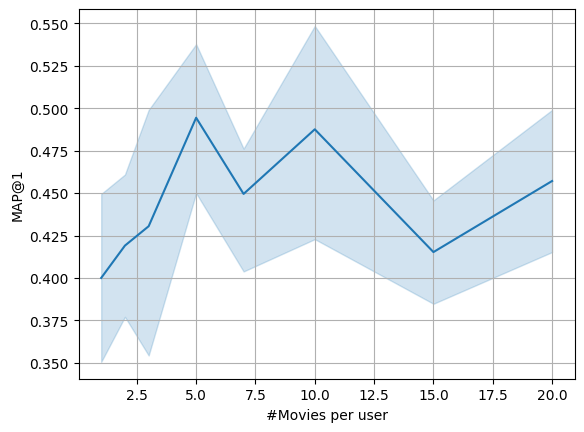

In [47]:
sns.lineplot(data=data_filtered_gpt2, x="nb_pos", y="MAP@1")
plt.xlabel("#Movies per user")
plt.grid(True)

### 3.4 Comparison with Matrix Factorization and NSP

In [48]:
data_filtered_bpr

,index,State,Name,Runtime,model_type,nb_pos,ndcg_1,ndcg_1_std,pop_1,pop_1_std,precision_1,precision_1_std,prompt_id,prompts,nb_test_users,offset,MAP@1
37,0,failed,resilient-frost-71,27,bpr,5,NaN,NaN,NaN,NaN,NaN,NaN,0,"('[M]', 'Movies like [M]', 'Movies similar to ...",50,0,NaN
51,14,failed,cool-energy-57,26,bpr,5,NaN,NaN,NaN,NaN,NaN,NaN,0,"('[M]', 'Movies like [M]', 'Movies similar to ...",50,0,NaN
65,28,failed,amber-sea-43,28,bpr,5,NaN,NaN,NaN,NaN,NaN,NaN,0,"('[M]', 'Movies like [M]', 'Movies similar to ...",50,0,NaN
79,42,failed,misty-star-29,21,bpr,5,NaN,NaN,NaN,NaN,NaN,NaN,0,"('[M]', 'Movies like [M]', 'Movies similar to ...",50,0,NaN
94,57,failed,treasured-bird-14,20,bpr,5,NaN,NaN,NaN,NaN,NaN,NaN,0,"('[M]', 'Movies like [M]', 'Movies similar to ...",50,0,NaN


All BRP runs have failed.

In [51]:
#sns.lineplot(data=data_filtered, x="nb_test_users", y="MAP@1", hue="model_type")

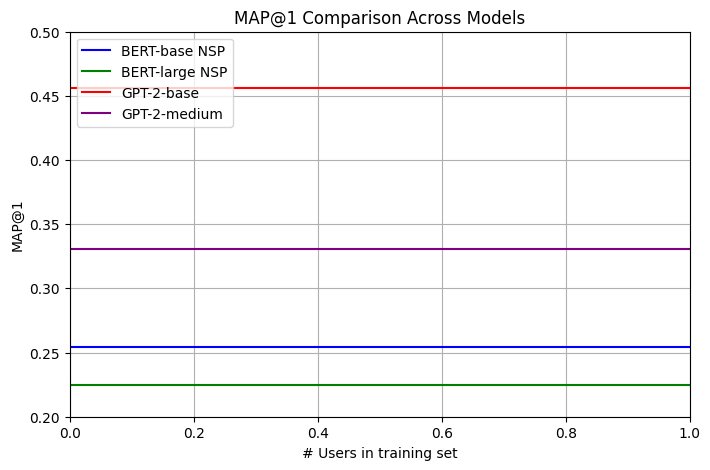

In [60]:
x_range = np.linspace(0, 20)

plt.figure(figsize=(8, 5))

plt.axhline(data_filtered_bert_base['MAP@1'].mean(), color="b", label="BERT-base NSP")
plt.axhline(data_filtered_bert_large['MAP@1'].mean(), color="g", label="BERT-large NSP")
plt.axhline(data_filtered_gpt2['MAP@1'].mean(), color="r", label="GPT-2-base")
plt.axhline(data_filtered_gpt_medium['MAP@1'].mean(), color="purple", label="GPT-2-medium")

plt.ylim(0.2, 0.5)
plt.xlabel("# Users in training set")
plt.ylabel("MAP@1")
plt.title("MAP@1 Comparison Across Models")

plt.legend(loc=2)
plt.grid()
plt.show()